#Martín Noblía

##Tp1


##Control de Robots 2013

Licencia: ![](http://i.creativecommons.org/l/by-sa/2.5/ar/88x31.png)


##Ejercicio 1

#### Un vector $^{A}P$ es rotado alrededor de $Z_A$ un ángulo $\theta$ y luego rotado alrededor de $X_A$ un ángulo $\phi$. Escribir la matriz rotación que describe las rotaciones anteriores en el orden en que se dieron.

In [37]:
from sympy import *

from IPython.core.display import Image 



In [38]:
#Con esto las salidas van a ser en LaTeX
init_printing(use_latex=True)

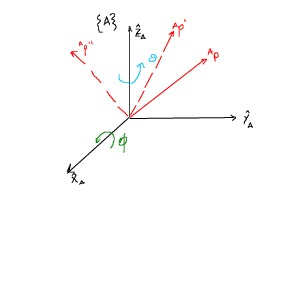

In [39]:
Image(filename='Imagenes/dibujo_tp1_ej1.jpg')

En este caso el vector rota sobre los ejes del sistema de referencia fijo {A} por ello la rotación total es la composición de las rotaciones sobre el eje $\hat{Z}_A$ y $\hat{X}_A$, esta composición se calcula como sabemos multiplicando las matrices de cada transformación, osea:

\begin{equation}
R(\theta,\phi) = R_X(\phi) R_Z(\theta)
\end{equation}


In [40]:
#Funcion simbólica para una rotación sobre el eje X
def Rot_X(angle):
    rad = angle*pi/180
    M = Matrix([[1,0,0],[ 0,cos(rad),-sin(rad)],[0,sin(rad), cos(rad)]])
    return M

#Funcion simbólica para una rotación sobre el eje Y
def Rot_Y(angle):
    rad = angle*pi/180
    M = Matrix([[cos(rad),0,sin(rad)],[ 0,1,0],[-sin(rad), 0,cos(rad)]])
    return M

#Funcion simbólica para una rotación sobre el eje Z
def Rot_Z(angle):
    rad = angle*pi/180
    M = Matrix([[cos(rad),- sin(rad),0],[ sin(rad), cos(rad), 0],[0,0,1]])
    return M

#Función para la rotación de ángulos fijos XZ

def Rot_XZ(a,b):
    
    M = Rot_X(b) * Rot_Z(a)
    
    return M

In [41]:
#estos son simbolos especiales que los toma como letras griegas directamente(muuy groso)
alpha, beta , gamma, phi, theta =symbols('alpha beta gamma phi theta')

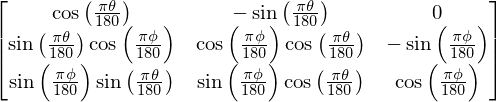

In [42]:
#Matriz de rotación simbólica
T_XZ = Rot_XZ(theta,phi)
T_XZ

In [43]:
#probemos con un ejemplo 
P = Matrix([[1],[0],[0]])
P

In [44]:
#lo vamos a girar $\theta$ = 90 y $phi$=90 (Tiene que dar Z)
P_new = T_XZ.subs([(theta,90),(phi,90)]) * P
P_new

## Ejercicio 2

Un vector $^{A}P$ es rotado alrededor de $\hat{Y}_A$ un ángulo de 30° y luego rotado alrededor de $\hat{X}_A$
un ángulo de 45°. Escribir la matriz rotación que describe las rotaciones anteriores en el
orden en que se dieron.

En este caso la composición de rotaciones fijas quedan:

$$R(\theta,\phi) = R_X(\phi) R_Y(\theta)$$


In [45]:
def Rot_XY(a,b):
    M = Rot_X(b) * Rot_Y(a)
    
    return M

In [46]:
T_XY = Rot_XY(theta,phi)

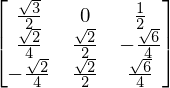

In [47]:
T_XY.subs([(theta,30),(phi,45)])

##Ejercicio 3

El sistema de referencia {B} se conforma de la siguiente manera: inicialmente coincide 
con {A}, luego lo rotamos alrededor de $\hat{Z}_B$ un ángulo $\theta$ y luego, al resultado anterior, lo

rotamos alrededor de $\hat{X}_B$ un ángulo $\phi$. Escribir la matriz rotación que describe el cambio de
descripción desde el vector $^{B}P$  al  $^{A}P$.


***



De acuerdo al enunciado, estamos girando el sistema de referencia {A} con respecto al sistema {B}, osea que tenemos:

\begin{equation}
^{B}_{A}R( \phi, \theta) = R_Z(\theta) R_X(\phi)
\end{equation}

In [48]:
def Rot_XZ(a,b):
    
    M = Rot_Z(b) * Rot_X(a)
    
    return M

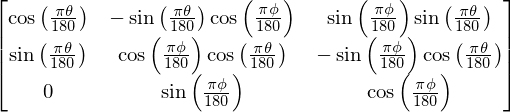

In [49]:
T_XZ = Rot_XZ(phi,theta)
T_XZ

## Ejercicio 4
A partir de los siguientes sistemas de referencia, dibujar un diagrama que muestre cada
una de las transformaciones. Luego hallar $^{B}_{C}T$ .

$$^{U}_{A}T = \begin{bmatrix}
            0.866 & -0.500 & 0.000 & 11.0 \\\\
            0.500 & 0.866 & 0.000  & -3.0 \\\\
            0.000 & 0.000 & 1.000 & 8.0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$


$$^{B}_{A}T = \begin{bmatrix}
            1 & 0 & 0.000 & 0 \\\\
            0.000 & 0.866 & -0.500  & 10.0 \\\\
            0.000 & 0.500 & 0.866 & -20.0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$


$$^{C}_{U}T = \begin{bmatrix}
            0.866 & -0.500 & 0.000 & -3.0 \\\\
            0.433 & 0.750 & -0.500  & -3.0 \\\\
            0.250 & 0.430 & 0.866 & 3.0 \\\\
            0 & 0 & 0 & 1    
      \end{bmatrix}$$
***

Esquemáticamente tenemos:

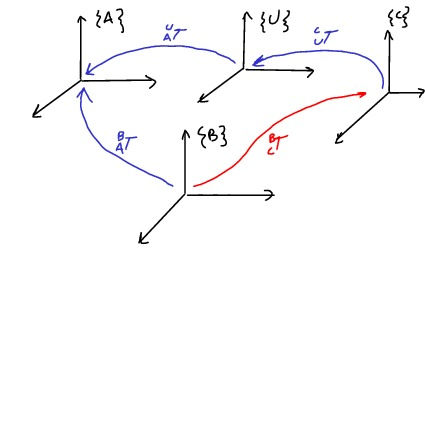

In [50]:
Image(filename='Imagenes/dibujo_eje4.jpeg')

Queremos hallar $^{B}_{C}T$ por ello planteamos la siguiente igualdad:
\begin{aligned}
^{C}_{U}T ^{U}_{A}T =  ((^{B}_{C}T)^{-1} )^{B}_{A}T \\
((^{B}_{C}T)^{-1} ) = (^{C}_{U}T) (^{U}_{A}T) (^{B}_{A}T)^{-1}\\
(^{B}_{C}T) = ((^{C}_{U}T) (^{U}_{A}T) (^{B}_{A}T)^{-1})^{-1}\\
(^{B}_{C}T) = (^{B}_{A}T) ((^{U}_{A}T))^{-1} ((^{C}_{U}T))^{-1} \\
(^{B}_{C}T) = (^{B}_{A}T) (^{A}_{U}T) (^{U}_{C}T) \\
\end{aligned}

In [51]:
%%latex
\begin{equation}
^{C}_{U}T ^{U}_{A}T =  ((^{B}_{C}T)^{-1} )^{B}_{A}T \\
((^{B}_{C}T)^{-1} ) = (^{C}_{U}T) (^{U}_{A}T) (^{B}_{A}T)^{-1}\\
(^{B}_{C}T) = ((^{C}_{U}T) (^{U}_{A}T) (^{B}_{A}T)^{-1})^{-1}\\
(^{B}_{C}T) = (^{B}_{A}T) ((^{U}_{A}T))^{-1} ((^{C}_{U}T))^{-1} \\
(^{B}_{C}T) = (^{B}_{A}T) (^{A}_{U}T) (^{U}_{C}T) \\
\end{equation}

<IPython.core.display.Latex object>

In [52]:
#definimos las matrices 
T_UA = Matrix([[0.866,-0.500,0.000,11.0],[0.500,0.866,0.000,-3.0],[0,0,1,8.0],[0,0,0,1]])
T_BA = Matrix([[1,0,0,0],[0,0.866,-0.500,10],[0,0.500,0.866,-20.0],[0,0,0,1]])
T_CU = Matrix([[0.866,-0.500,0,-3],[0.433,0.750,0.500,-3.0],[0.250,0.430,0.866,3.0],[0,0,0,1]])

Se puede demostrar, que la inversa de una transformación homogénea puede ser calculada computacionalmente de la siguiente manera:

$$^{B}_{A}T =  \begin{bmatrix}
                ^{A}_{B} R^{T}  & -(^{A}_{B} R^{T}) ( ^{A}P_{BORG})  \\\
                          \vec{0}   &   1 
                \end{bmatrix}$$


In [53]:
#Definimos una funcion para generar la inversa de una transformacion homogenea
def inverse_T_h(T_h):
    #extraemos la rotacion y traslacion
    M = zeros((4,4))
    R = T_h[0:3,0:3]
    P = T_h[0:-1,-1]
    
    R_inv = R.T
    
    P_new = -R_inv * P
    
    M[0:3,0:3] = R_inv
    M[0:-1,-1] = P_new
    M[-1,:]=Matrix([[0,0,0,1]])
    return M
    

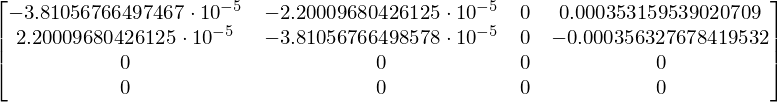

In [54]:
#verificamos 
inverse_T_h(T_UA)-T_UA.inv()

In [55]:
%%timeit
#tomamos el tiempo de procesamiento 
inverse_T_h(T_UA)

1000 loops, best of 3: 1 ms per loop


In [56]:
%%timeit
#tomamos el tiempo de procesamiento del metodo tradicional
T_UA.inv()

100 loops, best of 3: 3.46 ms per loop


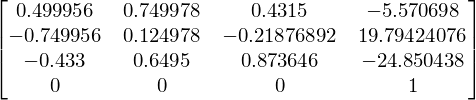

In [57]:
#Calculamos la transformacion de acuerdo a la ecuacion de arriba
T_BC = T_BA * inverse_T_h(T_UA) * inverse_T_h(T_CU)
T_BC

#Ejercicio 5

A partir de la siguiente figura hallar:

$$^{A}_{B}T$$

$$^{A}_{C}T$$

$$^{B}_{C}T$$

$$^{C}_{A}T$$
***


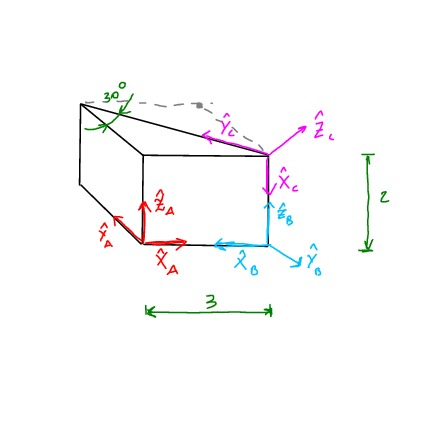

In [58]:
Image(filename='Imagenes/dibujo_tp1_eje5.jpeg')

$^{A}_{B}T = R_{\hat{Z}_A}(180º)D_{\vec{q}}([3,0,0])$

$^{A}_{C}T = R_{\hat{Z}_A}(30º)R_{\hat{Y}_A}(90º) D_{\vec{q}}([3,0,2])$

$^{B}_{C}T = R_{\hat{Z}_B}(150º)R_{\hat{Y}_B}(90º) D_{\vec{q}}([0,0,2])$

$(^{C}_{A}T) = (^{A}_{C}T )^{-1} = (^{A}_{C}T )^{T} $

#Ejercicio 6

**a**) Utilizando la convención de ángulos de Euler $Z-Y-X$ ($\alpha - \beta - \gamma$), escriba un programa para calcular la matriz de rotación $^{A}_{B}R$ cuando el usuario introduzca los ángulos de Euler($\alpha - \beta - \gamma$). Haga la prueba en dos ejemplos:

**i**) $\alpha = 10º$ , $\beta = 20º$, $\gamma = 30º$

**ii**) $\alpha = 30º$ , $\beta = 90º$, $\gamma = -55º$

Para el caso **i**) demueste las seis restricciones para matrices de rotación ortonormales unitarias(hay nueve números en una matriz de 3x3, pero solo tres son independientes). Además demuestre la hermosa propiedad, $^{B}_{A}R = (^{A}_{B}R)^{-1}  = (^{A}_{B}R)^{T}$

**b**) Escriba un programa para calcular los ángulos ($\alpha - \beta - \gamma$) de Euler cuando el usuario introduzca la matriz de rotación $^{A}_{B}R$(el problema inverso). Calcule las dos soluciones posibles. Demuestre esta solución inversa para los dos casos de la parte **a**). Use una comprobación circular para verificar sus resultados(es decir, introduzca los ángulos de Euler en el código de la parte **a**); tome la matriz de rotación $^{A}_{B}R$ resultante y utilicela como entrada para el código **b**); obtendrá dos conjuntos de respuestas; una debe ser la entrada original del usuario y la otra puede verificarse una vez más utilizando el código de la parte **a**) ).

**c**) Para una rotación simple de $\beta$ sobre el eje $Y$ solamente, para $\beta=20º$ y $^{B}P=[1,0,1]^{T}$ calcule $^{A}P$; demuestre que sus resultados son correctos

**d**) Compruebe los resultados con el toolbox de Corke
***

##Ángulos de Euler

 

Otra posible descripción de una trama {B} puede ser:

 

Comience con la trama que sea coincidente con una trama {A} conocida. Gire {B}  primero sobre $\hat{Z}_B$ usando un ángulo $\alpha$, después sobre $\hat{Y}_B$, usando un ángulo $\beta$, y finalmente sobre $\hat{X}_B$ usando un ángulo $\gamma$

 

Asi la transformacion queda:

 

 

$$^{A}_{B}R (\alpha,\beta,\gamma) = R_Z(\alpha) R_Y(\beta) R_X(\gamma)$$

 
Por ello definimos la función como:

In [59]:
#definimos la función de rotación de Euler
def Rot_Euler_ZYX(a,b,c):
    M = Rot_Z(a) * Rot_Y(b) * Rot_X(c)
    
    return M

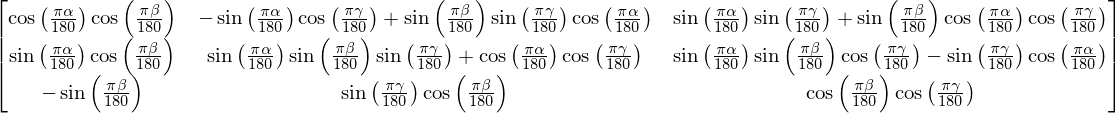

In [60]:
T_ZYX = Rot_Euler_ZYX(alpha,beta, gamma)
T_ZYX

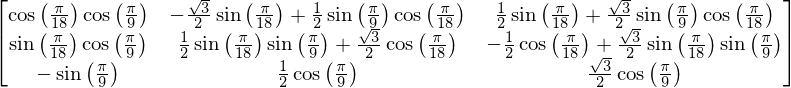

In [61]:
T_ZYX_i = Rot_Euler_ZYX(10,20,30)
T_ZYX_i

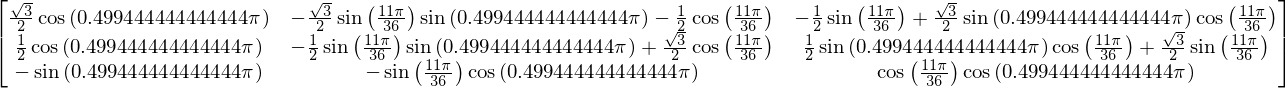

In [62]:
T_ZYX_ii = Rot_Euler_ZYX(30,89.9,-55)
T_ZYX_ii

Como sabemos una matriz de rotación $R$ la podemos pensar como:

$$R=[\hat{X} \hat{Y} \hat{Z}]$$

luego estos tres vectores unitarios son los ejes de alguna trama, escritos en términos de la trama de referencia. Cada uno es un vector unitario y los tres deben cumplir que sean mutuamente perpendiculares, por lo que podemos ver que hay seis restricciones en los nueve elementos de la matriz:

$$| \hat{X} | = 1$$

$$| \hat{Y} | = 1$$

$$| \hat{Z} | = 1$$

$$\hat{X}\hat{Y}=0$$

$$\hat{X}\hat{Z}=0$$

$$\hat{Y}\hat{Z}=0$$


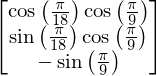

In [63]:
#Obtenemos el X 
X = T_ZYX_i[:,0]
X

In [64]:
#evaluamos numéricamente
X.norm().n(3)


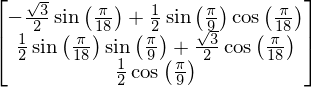

In [65]:
#Obtenemos el Y (generico)
Y = T_ZYX_i[:,1]
Y

In [66]:
Y.norm().n(3)

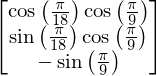

In [67]:
#Obtenemos el Z 
Z = T_ZYX_i[:,2]
X

In [68]:
Z.norm().n(3)

In [69]:
prod=X.T * Y
prod.n(3)

In [70]:
prod2=X.T * Z
prod2.n(3)

In [71]:
prod3=Y.T * Z
prod3.n(3)

In [72]:
#Demostramos la hermosa propiedad(multiplicamos a izquierda y derecha por la traspuesta)

a = T_ZYX_i * T_ZYX_i.T
b = T_ZYX_i.T * T_ZYX_i

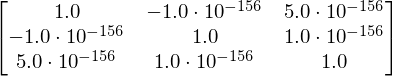

In [73]:
a.n(10)

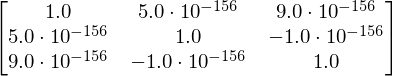

In [74]:
b.n(10)

In [75]:
#funcion para calcular los ángulos dada una matriz

def get_angle(M):
    #Calculamos beta y nos fijamos si es una singularidad
    b1 = atan2(-M[2,0],sqrt(M[0,0]**2+M[1,0]**2))
    if b1*180/pi == 90:
        print 'caso degenerado'
        a = 0
        c = atan2(M[0,1],M[1,1])
    
    elif b1*180/pi == -90:
        print 'caso degenerado'
        a = 0
        c = -atan2(-M[0,1],M[1,1])
    
    else:
        
        #b2 = atan2(-M[2,0],-sqrt(M[0,0]**2+M[1,0]**2))
        #b2 = b*180/pi
        
        #calculamos alpha
        a = atan2(M[1,0]/cos(b1),M[0,0]/cos(b1))
        #calculamos gamma
        c = atan2(M[2,1]/cos(b1),M[2,2]/cos(b1))
    
    a = a*180/pi
    b1 = b1*180/pi
    c = c*180/pi
    
    return  a.n(3),b1.n(3), c.n(3)

In [76]:
angulos = get_angle(T_ZYX_i)
angulos


In [77]:
get_angle(T_ZYX_ii)


In [78]:
# C)
T_Y = Rot_Y(20)

In [79]:
#Vector sobre el plano x-z con Arg = 45
P_B = Matrix([[1],[0],[1]])
P_B

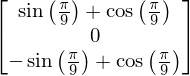

In [80]:
#rotamos 20 grados el vector ahora el Arg = 45-20 = 25
P_A = T_Y * P_B
P_A

In [81]:
angulo = atan2(P_A[2],P_A[0])*180/pi

In [82]:
angulo.n(3)